# Sobre as aulas


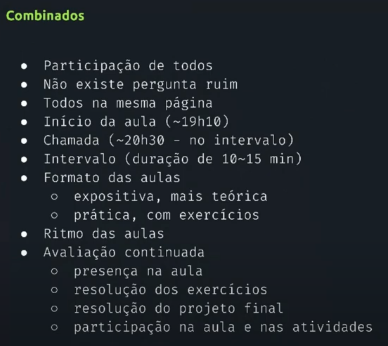

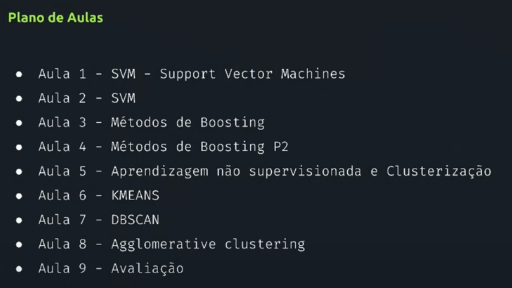

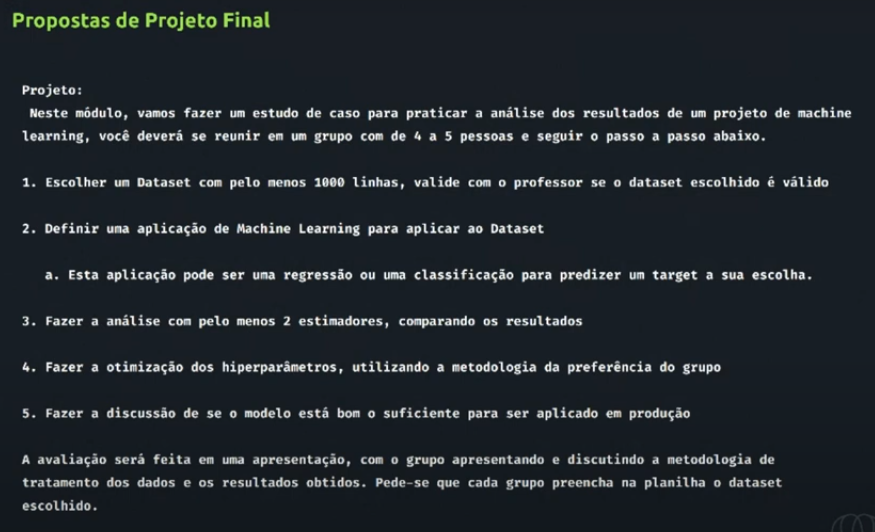

* [Formulário para o envio de exercícios.](https://docs.google.com/forms/d/e/1FAIpQLSdF2tuKEXPAKKcjDyskr1gWRbDz2wXEmYLom2Lgjc1qg4N3Xw/viewform)

# SVM

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Introdução
- 2) Classificadores de margem
- 3) Support Vector Machines

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 1) Introdução

Na aula de hoje, falaremos sobre um dos mais interessantes métodos de aprendizagm supervisionada: **SVM** (**S**upport **V**ector **M**achines).

Este método tem uma construção extremamente elegante e robusta, que, apesar de complexa, pode ser entendida em termos geométricos simples. Nesta aula, vamos explorar os principais aspectos desta construção, em uma apresentação mais alto-nível, sem nos preocuparmos demais com os detalhes matemáticos.

Um ponto importantíssimo sobre SVMs, que é o que de fato lhes confere poder tão elevado, é sua **capacidade de produzir uma hipótese simples, a partir de um conjunto de hipóteses complexo**, o que tem consequências diretas na **capacidade de generalização** de modelos SVM: eles são capazes de generalizar muito bem, apesar das hipóteses produzidas parecerem altamente complexas, o que é algo formidável!

Não entraremos nos detalhes matemáticos que justificam e provam os pontos acima. Mas, para quem tiver interesse, quase todo livro-texto de machine learning aborda estas questões. Recomendo, em particular, [este livro](https://www.google.com.br/books/edition/Learning_with_Kernels/7r34DwAAQBAJ?hl=pt-BR&gbpv=1&dq=learning+with+kernels&printsec=frontcover), que detalha extensivamente SVM e métodos relacionados; ou então [este livro](https://cs.nyu.edu/~mohri/mlbook/), que aborda formalmente a teoria de aprendizagem, eventualmente culminando no enorme sucesso de SVMs. Por fim, aproveito também pra recomendar [este curso](https://work.caltech.edu/index.html) do Caltech, onde os tópicos abordados no livro do Mohri são apresentados de maneira clara, direta, e muito ilustrativa. Esta é minha maior recomendação para quem tem interesse em iniciar os estudos em teoria de aprendizagem estatística, e então ter todo o fundamento rigoroso pra entender porque SVMs são tão interessantes!

Agora, vamos iniciar nossa exposição, introduzindo um conceito fundamental para SVMs: a **margem**, e os chamados **classificadores de margem**.

## 2) Classificadores de margem

Considere o seguinte dataset supervisionado de um problema de classificação binário:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/d8d83e07-66d8-47c6-a5e4-4a3e232481e2.PNG width=400>

É visível que os dados são linearmente separáveis. De fato, existem infinitas retas possíveis que separam perfeitamente as duas classes. Alguns exemplos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/bbf3d0a6-4707-471b-9f19-7290c13e4f23.PNG width=400>

Vamos olhar separadamente para cada um destes três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6c0bea51-dda9-400c-bb68-d7396e4fa606.PNG width=900>

Apesar de ambos separarem perfeitamente os dados de treino (erro de treino é nulo!), podemos nos perguntar: qual deles tem potencial de apresentar **melhor generalização?**

Para refletirmos sobre isso, considere que queremos classificar o ponto de teste indicado em preto:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/fbed2deb-bb38-4ef5-8558-99b7aff5c7b7.PNG width=900>

É super razoável que este ponto seja classificado como sendo da classe vermelha, não é mesmo? No entanto, o primeiro classificador irá classificá-lo como pertencente à classe azul.

Podemos nos perguntar: por que isso acontece?

Intuitivamente, é possível dizer que a fronteira de decisão do primeiro modelo está "**muito próxima**" dos pontos da classe vermelha, não é?

Mas, se estamos avaliando a **fronteira de decisão**, é razoável que nos importemos, na realidade, com a proximidade entre ela **e os "pontos mais externos"** da respectiva classe, não é mesmo? Afinal, intuitivamente, estes são os pontos que exercem maior influência sobre a fornteira de decisão, justo?

É aqui que entra o conceito de **margem**:

> Chamamos de **margem** a **menor distância** entre os pontos de treino e a fronteira de decisão

A seguir, visualizamos as margens associadas a cada um dos três modelos:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/72f191fc-7bc0-4451-923a-ecb939e88111.PNG width=900>

Dada a definição de margem, fica claro que o terceiro modelo seria nossa melhor opção, pois ele **apresenta maior margem**. De fato, intuitivamente, um classificador que apresenta maior margem, terá melhores chances de generalização!

> Chamamos de **classificador de margem máxima** um classificador **linear** que é construído de modo que a margem seja maximizada.

<div class="warning" style='padding:0.1em; background-color:#E9D8FD; color:#69337A'>
<span>
<h2>Conclusões</h2>
<ul>
<li>Um classificador de margem máxima tem alto potencial de generalização, para dados linearmente separáveis;
</ul>
</span>
<br>
</div>

No entanto, a intuição de que um classificador de margem máxima sempre será nossa melhor opção não é 100% correta... Considere o dataset a seguir, bem parecido com o dataset original, mas contendo um outlier da classe vermelha:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/79154075-f167-4c46-b361-e1febbaa4d83.PNG width=400>

Devido a este outlier, até mesmo o classificador de margem máxima terá uma generalização ruim, pois mesmo a margem máxima é extremamente estreita, o que aumenta a variância do modelo:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/da32de74-064a-43a7-98cc-366a348fe275.PNG width=400>

E pode ser que problemas ainda mais graves ocorram, caso outliers ainda mais "extremos" existam, como no caso do dataset a seguir:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/7be60cd3-e7f8-46bd-85bc-73ec1d4b0bb5.PNG width=400>

Neste caso, nós não temos mais separabilidade linear, de modo que a construção de um classificador de margem máxima não é mais possível.

Como resolver este problema?

Com a introdução do **classificador de margem suave (*soft margin classifier*)**!

### Classificador de margem suave

Um classificador de margem suave é obtido com uma modificação extremamente simples com relação ao classificador de margem máxima: a permissão de que **erros de classificação** sejam cometidos na base de treino! Uma possível solução seria algo assim:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/cfacd48d-9713-4bec-9fd7-ea1b4ae380f5.PNG width=400>

Neste caso, temos duas observações incorretas dentro da margem - e está tudo bem, pois dados que estas observações são outliers, não precisamos mos preocupar em ajustar a margem a elas!

Com isso, temos um modelo com um viés um pouco maior, mas com variância bem menor - caminhamos na direção do **sweet spot** de generalização!!

Note, portanto, que a introdução de uma margem suave pode ser visto como **um procedimento de regularização** aplicado ao classificador de margem! E é exatamente assim que veremos este procedimento quando chegarmos em SVM - um procedimento de regularização!

> Um classificador de margem suave é também chamado de **classificador de vetores de suporte (*support vector classifier*)**, sendo que os pontos que "apoiam" a margem são justamente os chamados **vetores de suporte (*support vectors*)**.

Estamos chegando perto das SVMs!

Mas, antes de chegarmos lá, é importante frisarmos um ponto fundamental:

> A **fronteira de decisão** de um classificador de margem suave (de vetores de suporte) é **linear** no espaço de features em que o classificador é treinado, ou seja, a hipótese treinada (isto é, a superfície de decisão) será **um hiperplano** de dimensão $D-1$, onde $D$ é a dimensão do espaço de features

Vamos entender melhor o comentário acima com alguns exemplos:

### $D=2$

Se temos uma duas features$(X_1, X_2)$, teremos um **hiperplano $1-$dimensional**, que nada mais é que **uma reta** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/6ca9b6d4-90fb-4d92-8a73-42ecec09d562.PNG width=400>

### $D=3$

Se temos uma três features$(X_1, X_2, X_3)$, teremos um **hiperplano $2-$dimensional**, que nada mais é que **um plano** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/b91951b3-9256-4a38-abd6-287811332db8.PNG width=400>

### $D=1$

Se temos uma única feature $(X)$, teremos um **hiperplano $0-$dimensional**, que nada mais é que **um ponto** como fronteira de decisão:

<img src=https://s3-sa-east-1.amazonaws.com/lcpi/000d5eb5-25e7-485b-bf36-6ad944970e27.PNG width=400>

Para dimensões maiores, $D > 3$, não conseguimos mais visualizar a fronteira de decisão, mas, se qualquer forma, ela será linear (por isso, um hiper**plano**!).

Agora estamos prontos para introduzir as tão aguardadas **Support Vector Machines!**


<img src=" 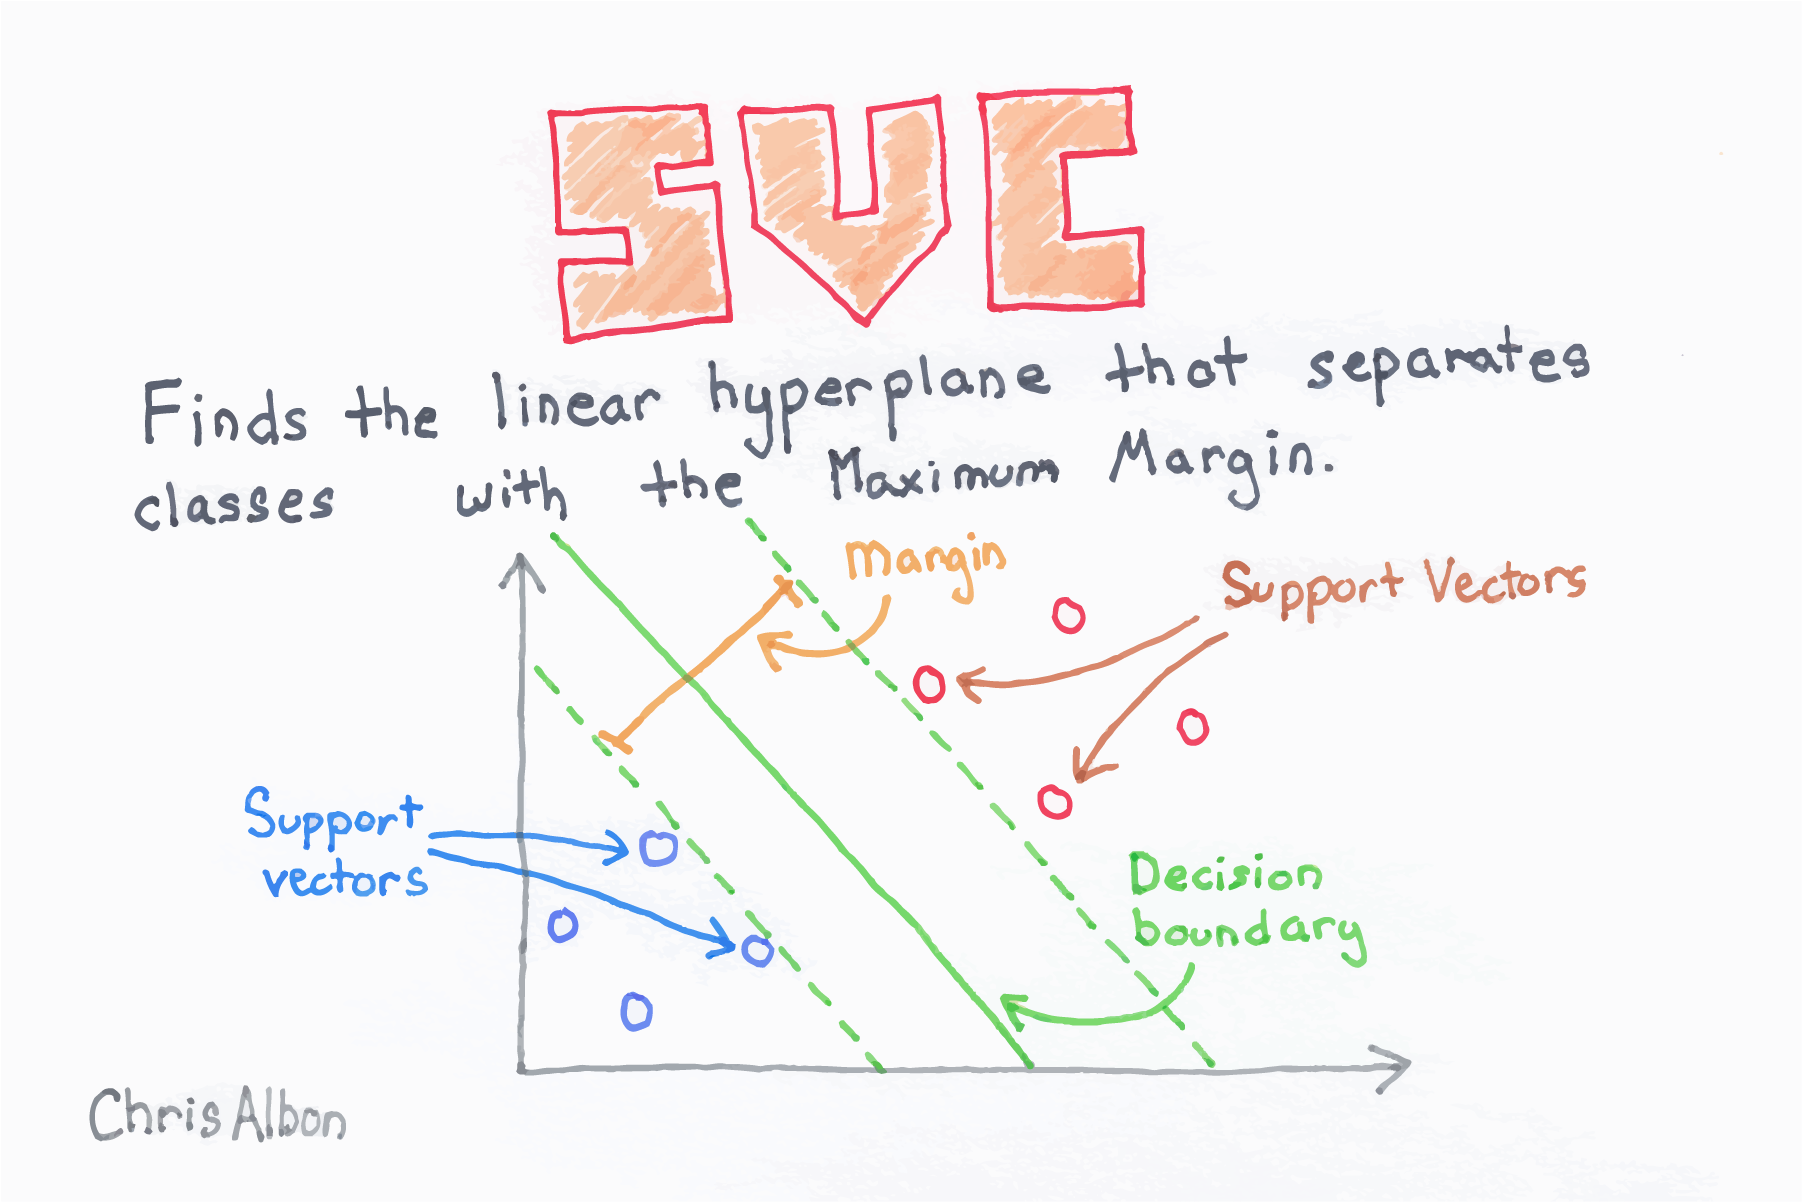" width=500 />

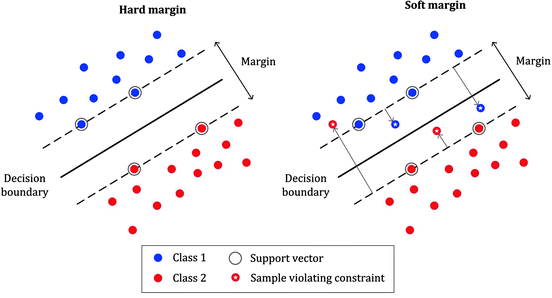

## Visualizar o dataset iris

In [ ]:
# Carregar e entender o dataset
import seaborn as sns
# df = pd.read_csv('../datasets/iris.csv')
df = sns.load_dataset("iris")


In [ ]:
# EDA

# Definir quem são features e o target
X= df.drop(columns=["species"])
y = df['species']

In [ ]:
df["species"].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [ ]:
# Particionar o dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify=y)

In [ ]:
# Escolher o modelo -> modelo supervisionado de classificcação

# Fazer a padronização dos dados - escalando

# modelo
from sklearn.svm import LinearSVC
svc= LinearSVC()
svc.fit(X_train, y_train)

# predict
y_pred = svc.predict(X_test)

# avaliar
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



/home/victor/Documents/1-DataScience/3-Aulas/1-Ada/ML2/venv/ml2/lib/python3.9/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/victor/Documents/1-DataScience/3-Aulas/1-Ada/ML2/venv/ml2/lib/python3.9/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# Exercício
Admission_Predict.csv

Exercício Com os dados do arquivo Admission_Predict.csv realize uma classificação dos alunos que possuem chance maior que 0.8 de admissão e dos que possuem chance menor que 0.8. Compare diversos modelos e determine qual seria o melhor a ser implementado. Agora inclusive o SVM.